In [2]:
import os
import tarfile
import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
path = os.path.join("datasets","housing")
url = download_root + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url = url, housing_path = path):
    os.makedirs(path, exist_ok = True)
    tgz_path = os.path.join(path,"housing.tgz")
    urllib.request.urlretrieve(url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import pandas as pd

def load_data(housing_path = path):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data()
housing = load_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print("Shape of data (rows and columns):    " + str(housing.shape))
print("\n\nDescription:\n")
housing.info()
print("\nDifferent categories for \"ocean_proximity\":")
housing["ocean_proximity"].value_counts()

Shape of data (rows and columns):    (20640, 10)


Description:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Different categories for "ocean_proximity":


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
print("\nStatistics of housing dataset:")
housing.describe()


Statistics of housing dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
print("\nCorrelations:")
housing.corr()


Correlations:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [9]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

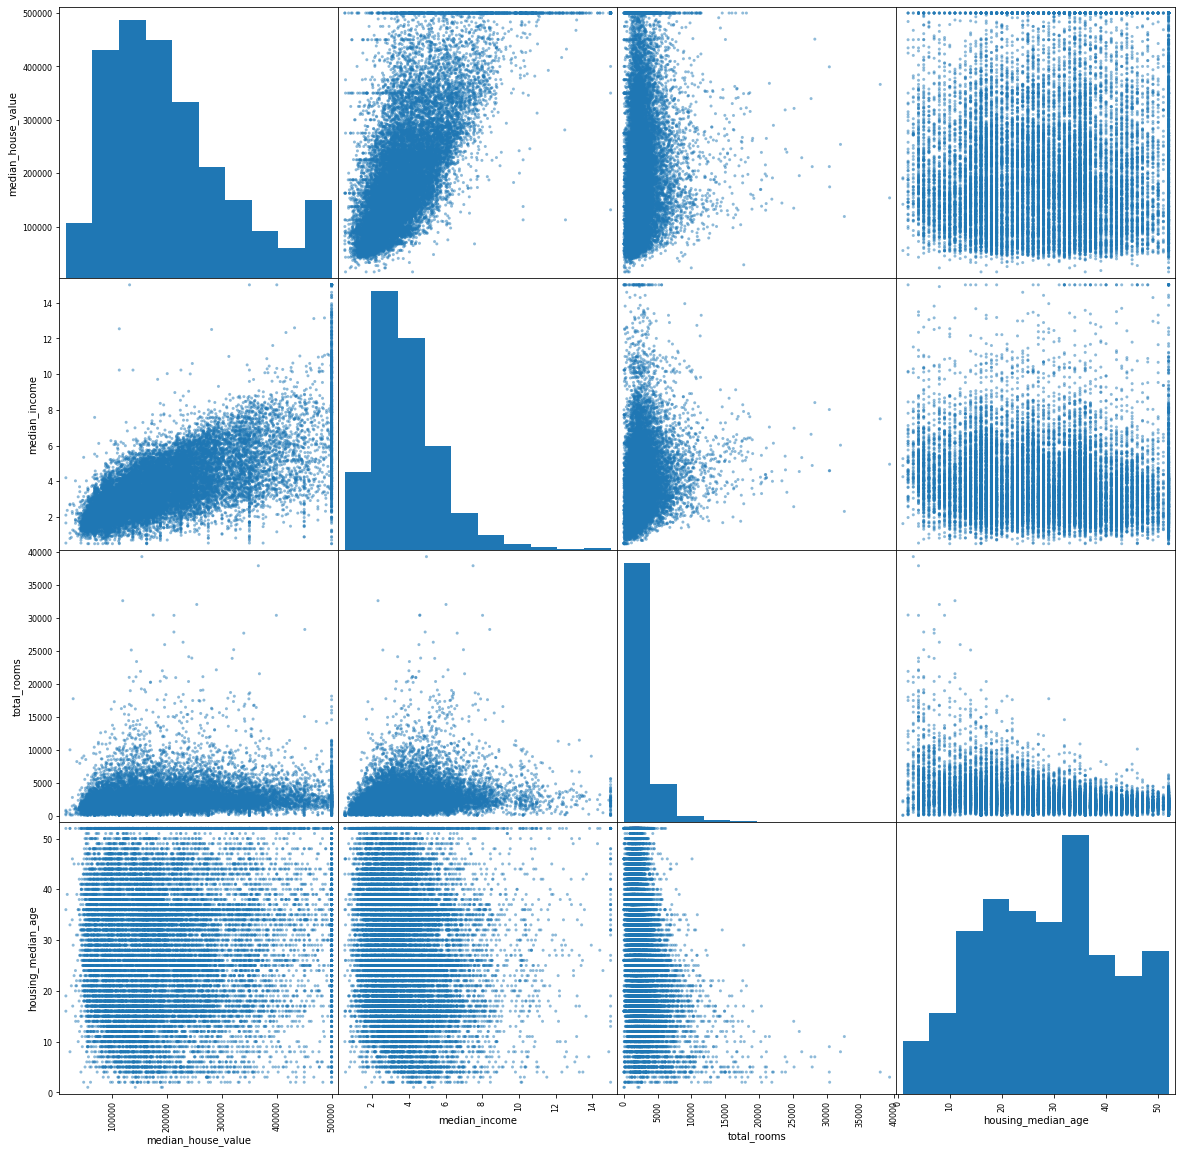

In [10]:
%matplotlib inline
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
matrix = scatter_matrix(housing[attributes],figsize = (20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c3aee8190>,
      dtype=object)

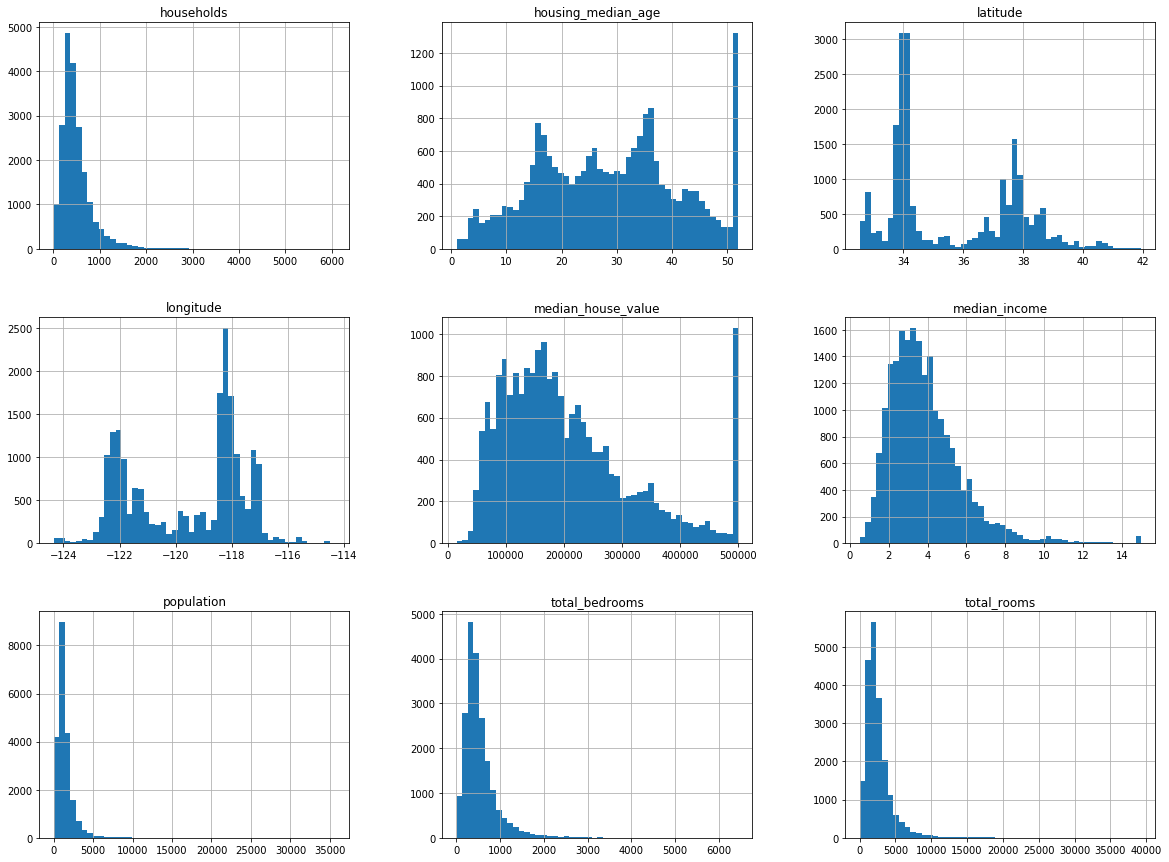

In [11]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))

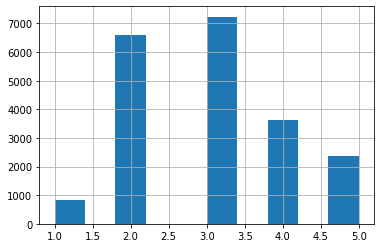

In [12]:
import numpy as np

housing["income_categories"] = pd.cut(housing["median_income"],     # DATA STRATIFICATION BY MEDIAN INCOME STRATA
                                      bins = [0.0,1.5,3.0,4.5,6.0,np.inf], 
                                      labels = [1,2,3,4,5])

housing["income_categories"].hist()       # Creating histogram from dataset subset

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(housing, housing["income_categories"]):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]

print("\nTrain set income category proportions:")
print(stratified_train_set["income_categories"].value_counts() / len(stratified_train_set))

print("\n\nTest set income category proportions:")
print(stratified_test_set["income_categories"].value_counts() / len(stratified_train_set))

for set_ in (stratified_train_set, stratified_test_set):
    set_.drop("income_categories", axis = 1, inplace = True)


Train set income category proportions:
3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_categories, dtype: float64


Test set income category proportions:
3    0.087633
2    0.079700
4    0.044089
5    0.028646
1    0.009932
Name: income_categories, dtype: float64


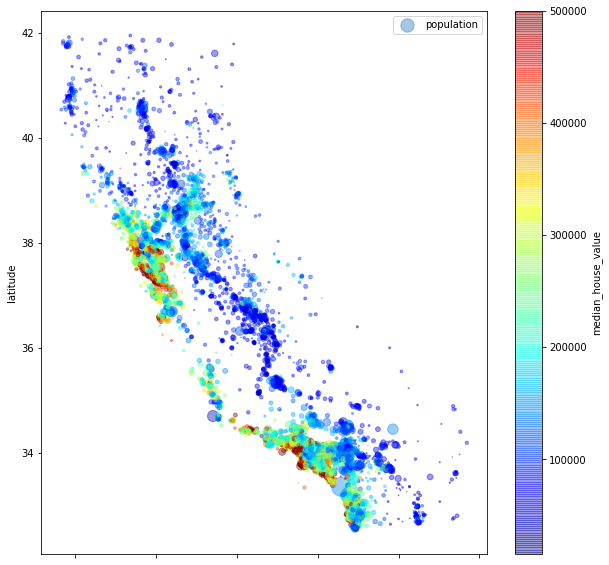

In [14]:
housing = stratified_train_set.copy()

housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
             s = housing["population"]/100, 
             label = "population",
             figsize = (10,10),
             c = "median_house_value",
             cmap = plt.get_cmap("jet"),
             colorbar = True)

plt.legend()

In [15]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [16]:
correlation_matrix = housing.corr()

In [17]:
correlation_matrix["median_income"].sort_values(ascending = False)

median_income               1.000000
median_house_value          0.687160
rooms_per_household         0.311563
total_rooms                 0.200087
population_per_household    0.021822
households                  0.010781
population                  0.002380
total_bedrooms             -0.009740
longitude                  -0.019583
latitude                   -0.075205
housing_median_age         -0.111360
bedrooms_per_room          -0.624674
Name: median_income, dtype: float64

In [18]:
correlation_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

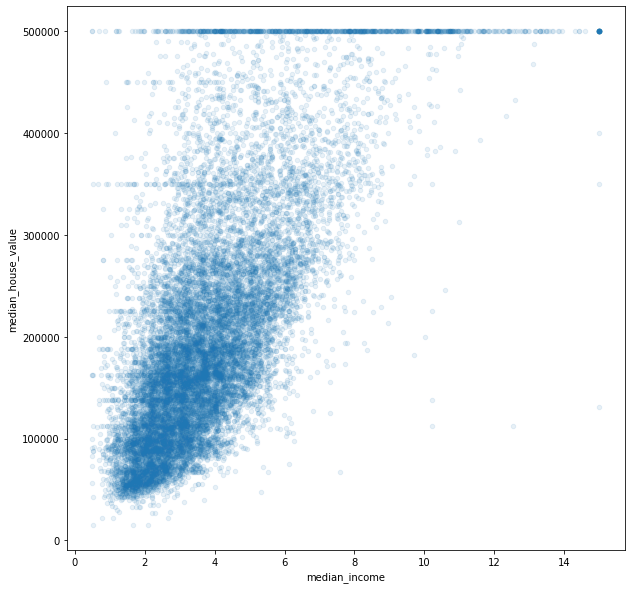

In [19]:
%matplotlib inline
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, figsize = (10,10))

In [20]:
housing = stratified_train_set.drop("median_house_value", axis = 1)  # Start of preprocessing
housing_labels = stratified_train_set["median_house_value"].copy()

In [21]:
housing.dropna(subset=["total_bedrooms"])   # Drops null rows in total_bedrooms column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

housing_numbers = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_numbers)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [24]:
imputer.fit(housing_numbers)
X = imputer.transform(housing_numbers)

housing_train = pd.DataFrame(X, columns = housing_numbers.columns, index = housing_numbers.index) # training set

In [36]:
from sklearn.preprocessing import OneHotEncoder

housing_categories = housing[['ocean_proximity']]
categorical_encoder = OneHotEncoder()
housing_categories_1hot = categorical_encoder.fit_transform(housing_categories)
housing_categories_1hot.toarray()

print(housing_categories_1hot.toarray())
categorical_encoder.categories_

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

number_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                            ('attributes_adder', CombinedAttributesAdder()),
                            ('standard_scaler', StandardScaler()),])

housing_numbers_train = number_pipeline.fit_transform(housing_numbers)

In [52]:
from sklearn.compose import ColumnTransformer

numerical_attributes = list(housing_numbers)
categorical_attributes = ['ocean_proximity']

full_pipeline = ColumnTransformer([('number', number_pipeline, numerical_attributes),
                                   ('category', OneHotEncoder(), categorical_attributes),])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared.view()

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)

print("Predictions:", linear_regression.predict(sample_data_prepared))
print("Labels:", list(sample_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [55]:
from sklearn.metrics import mean_squared_error
housing_predictions = linear_regression.predict(housing_prepared)
linear_mean_square_error = mean_squared_error(housing_labels, housing_predictions)
linear_RMSE = np.sqrt(linear_mean_square_error)
linear_RMSE

68628.19819848923